In [3]:
import pandas as pd
import wandb
import matplotlib.pyplot as plt

In [4]:
api = wandb.Api()
entity, project = "sashalikesplanes", "CrossValid"
runs = api.runs(entity + '/' + project)

best_accuracy, exp_type = [], []
for run in runs:
    try:
        best_accuracy.append(run.history()['accuracy'].max())
        exp_type.append(run.sweep.name)
    except KeyError:
        print("run has no accuracy")

wandb: WARNING A graphql request initiated by the public wandb API timed out (timeout=9 sec). Create a new API with an integer timeout larger than 9, e.g., `api = wandb.Api(timeout=19)` to increase the graphql timeout.


In [5]:
cross_valid_runs = pd.DataFrame({
"exp_type": exp_type,
"accuracy": best_accuracy,})

In [23]:
cross_valid_runs.exp_type.unique()

array(['DI - subject 9', 'DI - subject 8', 'DI - subject 7',
       'DI - subject 6', 'DI - subject 5', 'DI - subject 4',
       'DI - subject 3', 'DI - subject 2', 'DI - subject 1',
       'SI - subject 9', 'SI - subject 8', 'SI - subject 7',
       'SI - subject 6', 'SI - subject 5', 'SI - subject 4',
       'SI - subject 3', 'SI - subject 2', 'SI - subject 1'], dtype=object)

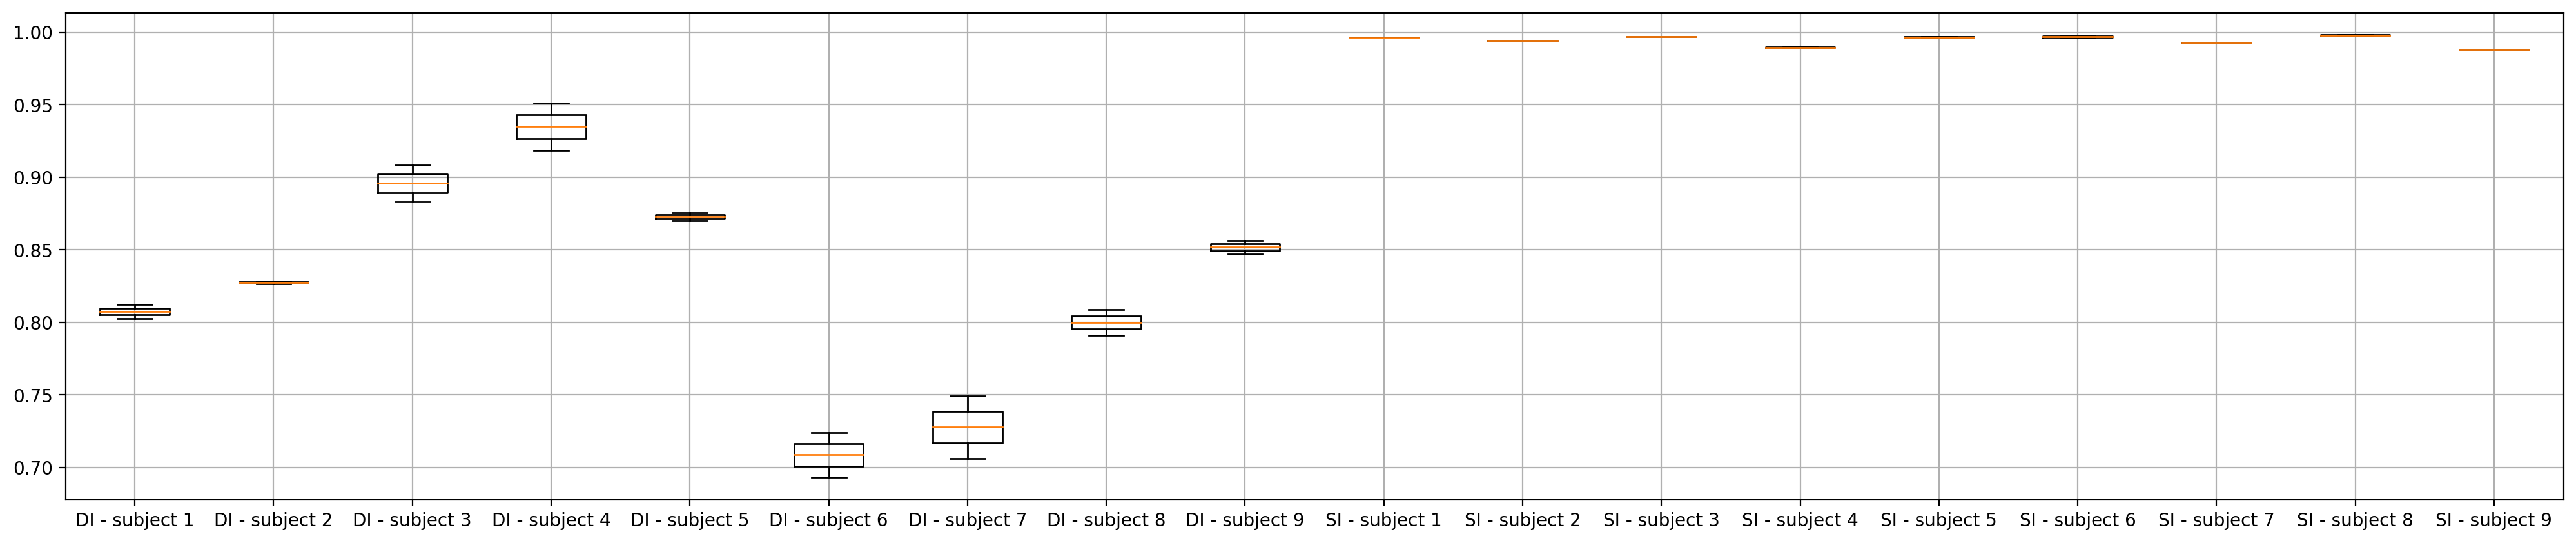

In [9]:
plot_hist(['DI - subject 1', 'DI - subject 2', 'DI - subject 3',
       'DI - subject 4', 'DI - subject 5', 'DI - subject 6',
       'DI - subject 7', 'DI - subject 8', 'DI - subject 9','SI - subject 1', 'SI - subject 2', 'SI - subject 3',
       'SI - subject 4', 'SI - subject 5', 'SI - subject 6',
       'SI - subject 7', 'SI - subject 8', 'SI - subject 9'], cross_valid_runs, width=25, height=5)

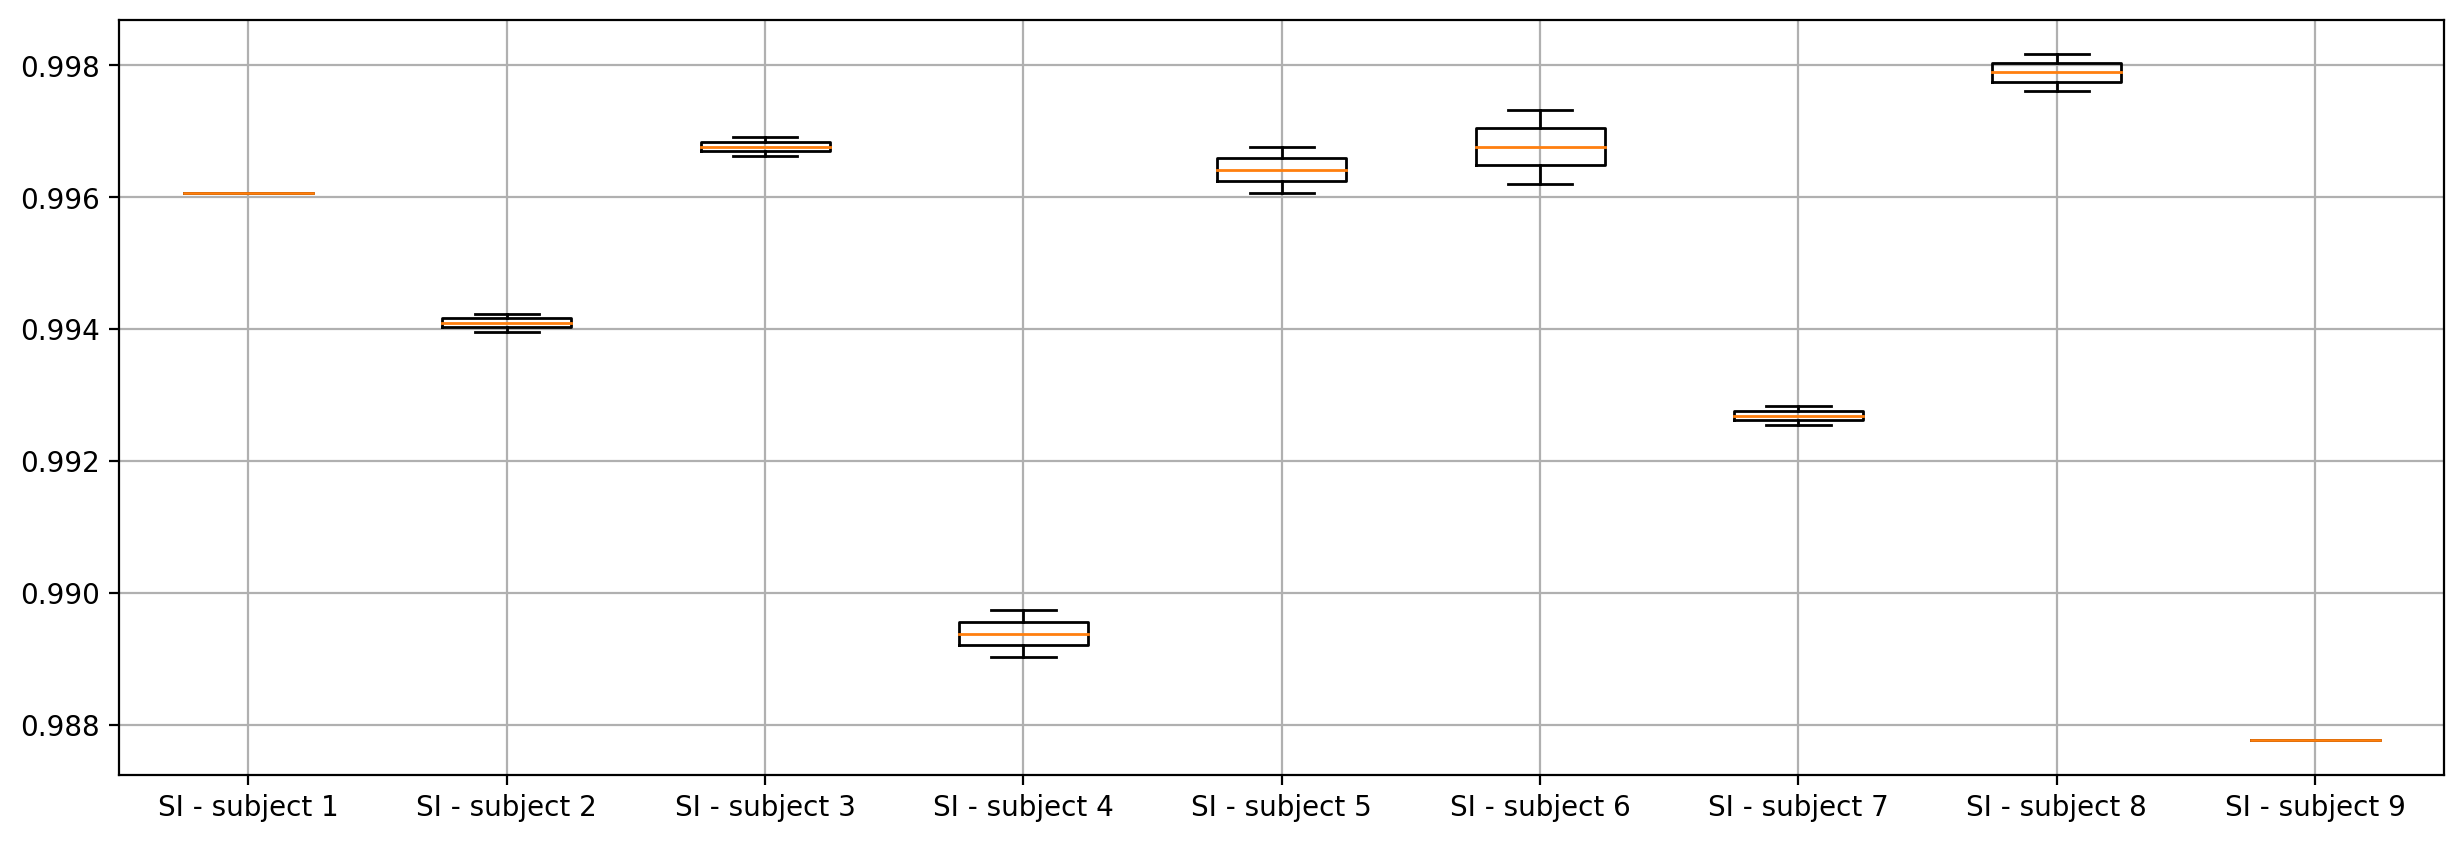

In [28]:
plot_hist(['SI - subject 1', 'SI - subject 2', 'SI - subject 3',
       'SI - subject 4', 'SI - subject 5', 'SI - subject 6',
       'SI - subject 7', 'SI - subject 8', 'SI - subject 9'], cross_valid_runs, width=15, height=5)

In [11]:
api = wandb.Api()
entity, project = "sashalikesplanes", "ModelReplicate"
runs = api.runs(entity + '/' + project)

best_accuracy, exp_type = [], []
for run in runs:
    try:
        best_accuracy.append(run.history()['accuracy'].max())
        exp_type.append(run.sweep.name)
    except KeyError:
        print("run has no accuracy")

deriv_runs = pd.DataFrame({
"exp_type": exp_type,
"accuracy": best_accuracy,})

run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy
run has no accuracy


In [29]:
api = wandb.Api()
entity = "sashalikesplanes"
project = "CompVsPurs"
runs = api.runs(entity + '/' + project)
best_accuracy, exp_type = [], []
for run in runs:
    try:
        best_accuracy.append(run.history()['accuracy'].max())
        exp_type.append(run.sweep.name)
    except KeyError:
        print("run has no accuracy")
cp_runs = pd.DataFrame({
"exp_type": exp_type,
"accuracy": best_accuracy,})

In [61]:
cp_runs.exp_type.unique()

array(['SI, e, u, x, all dt', 'SI, e, u', 'DI, e, u, x',
       'DI, e, u, x, all dt', 'DI, e, u', 'SI, e, u, x'], dtype=object)

In [7]:
def plot_hist(exp_names, runs_df, width=15, height=5):
    accuracies_per_exp = [runs_df[runs_df.exp_type == exp].accuracy.to_numpy() for exp in exp_names]
    plt.boxplot(accuracies_per_exp, labels=exp_names)
    plt.grid()
    fig = plt.gcf()
    fig.set_size_inches(width,height)
    fig.set_dpi(200)

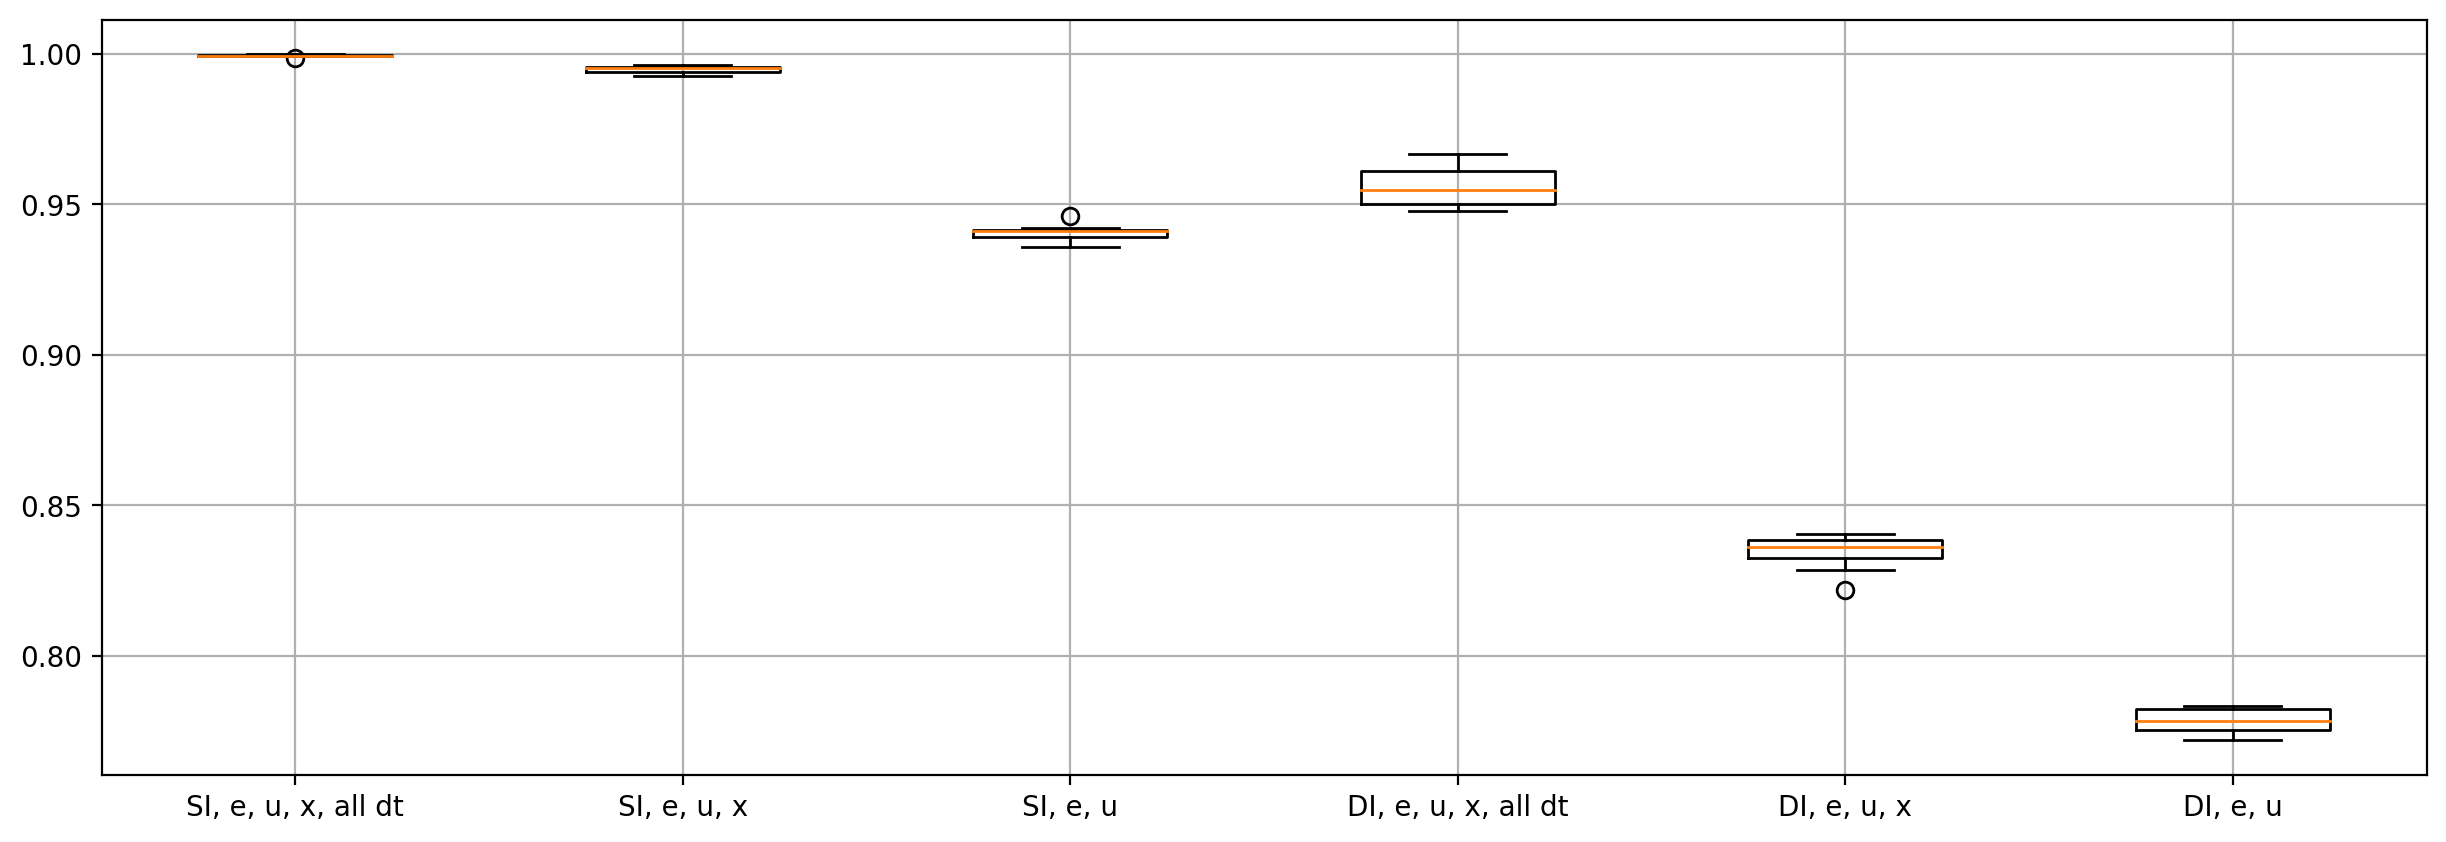

In [30]:
plot_hist(['SI, e, u, x, all dt', 'SI, e, u, x', 'SI, e, u', 
       'DI, e, u, x, all dt','DI, e, u, x', 'DI, e, u'], cp_runs)

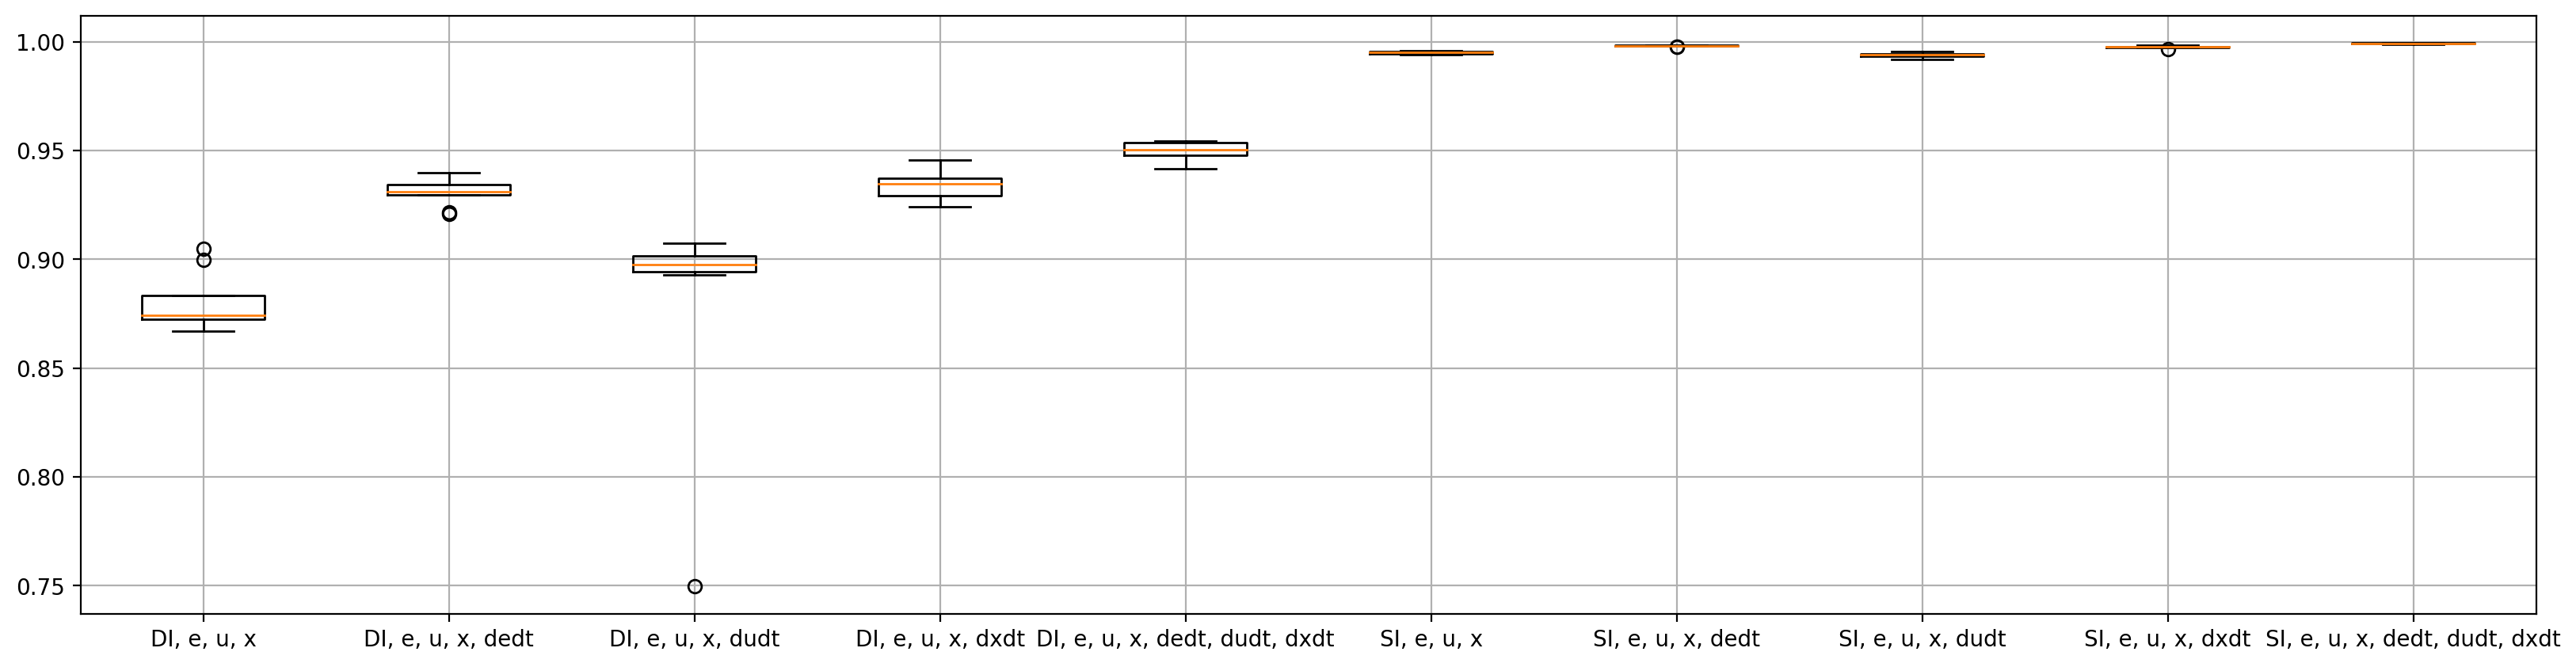

In [12]:
exp_names_DI_derivs = [
                'DI, e, u, x',
                'DI, e, u, x, dedt',
                'DI, e, u, x, dudt',
                'DI, e, u, x, dxdt',
                'DI, e, u, x, dedt, dudt, dxdt',
    'SI, e, u, x',
 'SI, e, u, x, dedt',
 'SI, e, u, x, dudt',
 'SI, e, u, x, dxdt',
 'SI, e, u, x, dedt, dudt, dxdt',
 ]
plot_hist(exp_names_DI_derivs, deriv_runs, width=20)

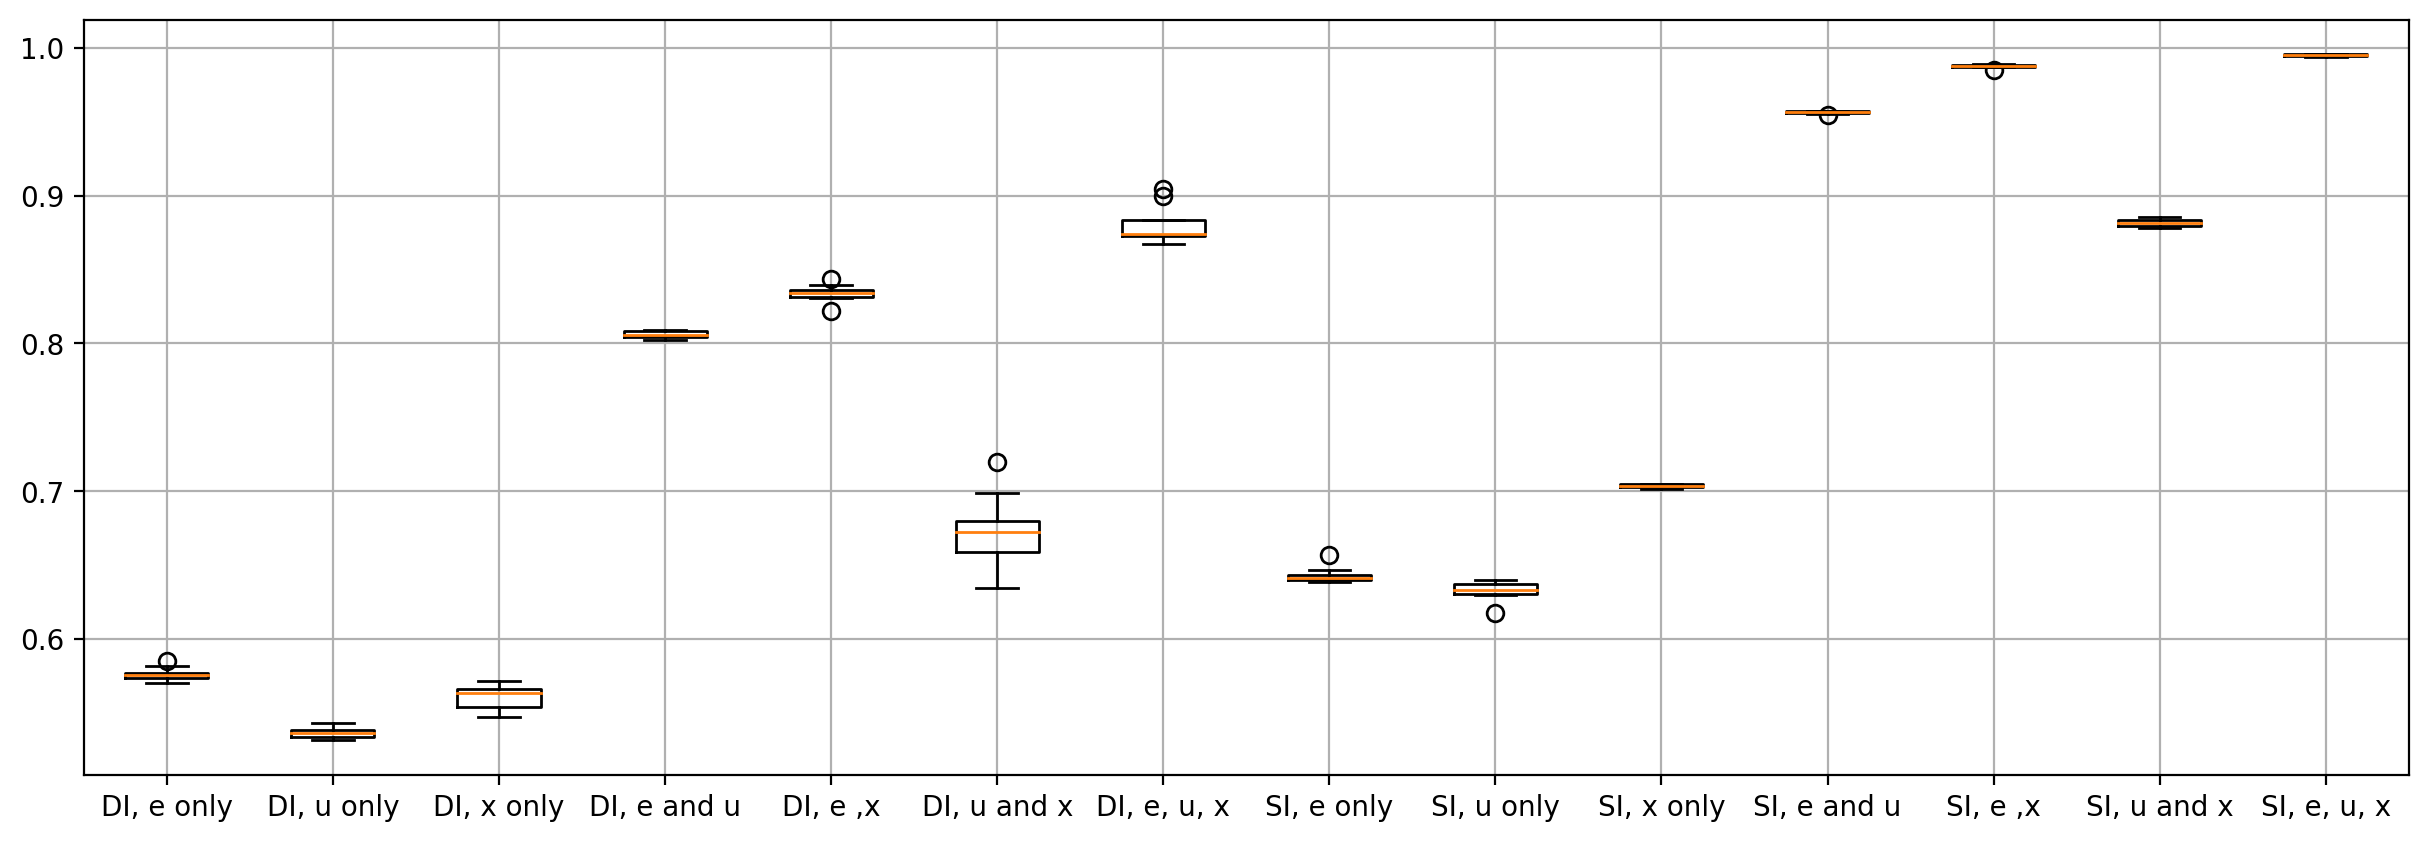

In [34]:
exp_names_DI_signals = [
                'DI, e only',
    'DI, u only',
                'DI, x only',
                
                'DI, e and u',
                'DI, e ,x',
                'DI, u and x',
                'DI, e, u, x',
    'SI, e only',
     'SI, u only',
     'SI, x only',
     'SI, e and u',
     'SI, e ,x',
     'SI, u and x',
     'SI, e, u, x', 
 ]
plot_hist(exp_names_DI_signals, deriv_runs)

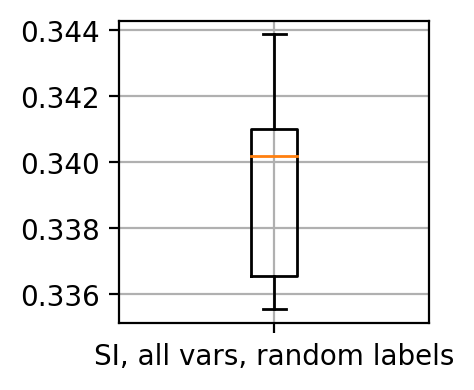

In [42]:
exp_names_SI_random = ['SI, all vars, random labels',]
plot_hist(exp_names_SI_random, width=2, height=2)

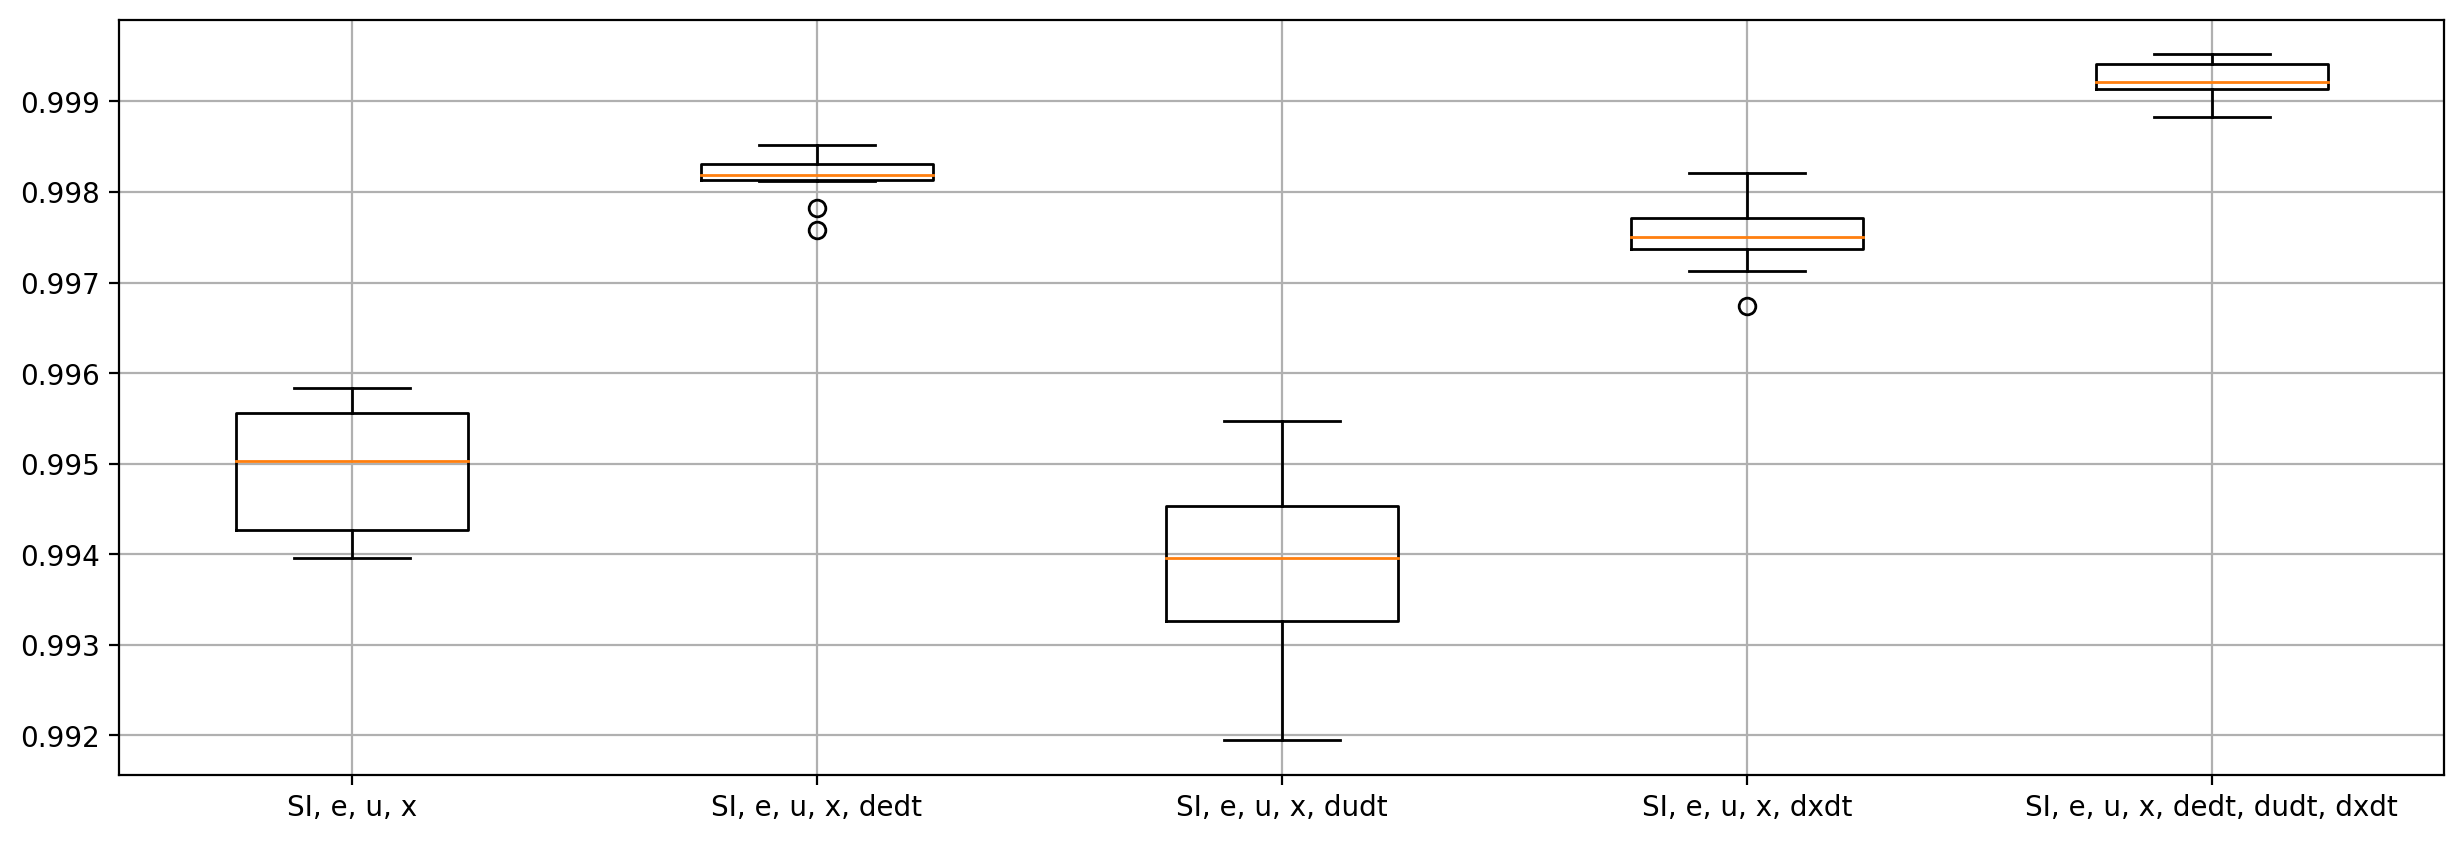

In [43]:
si_derivs = [
 
 ]
plot_hist(si_derivs)

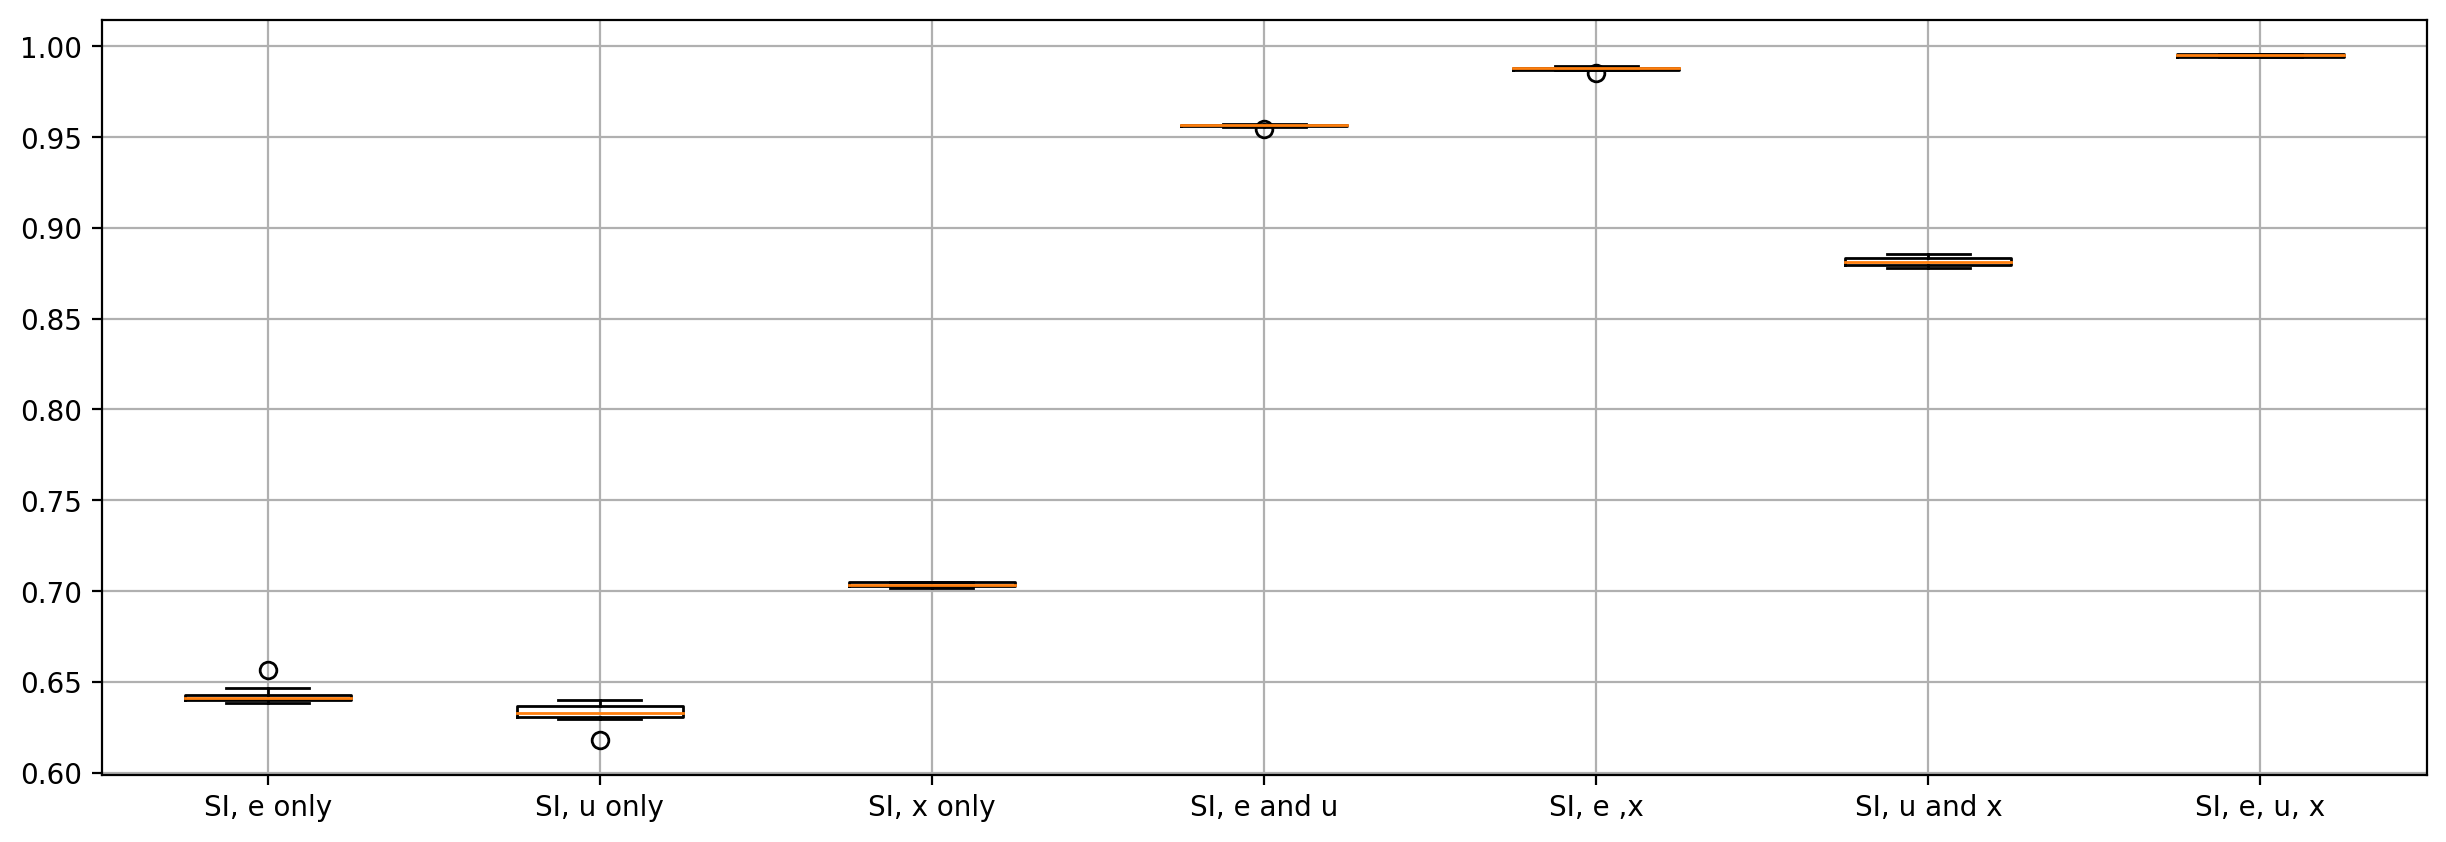

In [58]:
si_sigs = [
     
]
plot_hist(si_sigs)

In [57]:
comp_purs_runs, comp_purs_names = get_runs("CompVsPurs")

In [52]:
comp_purs_names

['Best Model on SI',
 'Best Model, no de, dx, du, and x',
 'DI, e ,x',
 'DI, e and u',
 'DI, e only',
 'DI, e, u, x',
 'DI, e, u, x, dedt',
 'DI, e, u, x, dedt, dudt, dxdt',
 'DI, e, u, x, dudt',
 'DI, e, u, x, dxdt',
 'DI, u and x',
 'DI, u only',
 'DI, x only',
 'Incorrect labels',
 'Replicate Model 25 x 25',
 'SI, all vars, random labels',
 'SI, e ,x',
 'SI, e and u',
 'SI, e only',
 'SI, e, u, x',
 'SI, e, u, x, dedt',
 'SI, e, u, x, dedt, dudt, dxdt',
 'SI, e, u, x, dudt',
 'SI, e, u, x, dxdt',
 'SI, u and x',
 'SI, u only',
 'SI, x only']